In [1]:
from __future__ import print_function
import os
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold,KFold
import torch.nn.functional as F
import torch
import time
import xlrd
from torch import nn, optim
import collections
import sys
import csv
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pandas as pd
from torch.autograd import Variable
import math
import copy
import random



import sys
sys.path.append("/home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set")
import numpy
import Cython


import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
device = torch.device('cuda')
#device = torch.device('cuda')
print(torch.__version__)
print(device)

1.12.1
cuda


In [2]:
filename_his = "/home/l/20211218 practice/svm/blackleg_3classes.csv"
print('The path of histone_data',filename_his)
with open(filename_his) as fi_his:
    csv_reader=csv.reader(fi_his)
    data=list(csv_reader)
    ncols=(len(data[0]))
fi_his.close()

nrows = (len(data)-1)
ncols = (len(data[1])-2)
#print(nrows)
#print(ncols)
y_kfold=[]
x_kfold = np.empty([nrows,ncols], dtype = float) 
#print(x_kfold.shape)
for i in range (0, nrows):
    if data[i+1][1] == 'A':
        y_kfold.append(0)
    elif data[i+1][1] == 'B':
        y_kfold.append(1)
    elif data[i+1][1] == 'C':
        y_kfold.append(1)
    for j in range (0, ncols): 
  #      print(data[i+1][j+2])
        x_kfold[i][j] = data[i+1][j+2]
#    print(i)
#    print(data[i+1][1]) 
#    print(y[i])
print(y_kfold)    
len(y_kfold)
print(x_kfold.shape)
print(x_kfold[62][1829])

The path of histone_data /home/l/20211218 practice/svm/blackleg_3classes.csv
[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
(63, 1830)
12.5


In [3]:
def loadData(windows,file1,file2):
  #  print('Data Reading>>>>>>>>>>>>>>>*****')
    filename_his = file1
 #   print('The path of histone_data',filename_his)
    with open(filename_his) as fi_his:
        csv_reader=csv.reader(fi_his)
        data=list(csv_reader)
        ncols=(len(data[0]))
    fi_his.close()

    nrows=len(data)
    ngenes=nrows/windows
    nfeatures=ncols-1
 #   print("Number of entries: %d" % ngenes)
 #   print("Number of rows: %d" % nrows)
 #   print("Number of features: %d" % nfeatures)

    filename_gene = file2
 #   print('The path of gene_expression',filename_gene)
    with open(filename_gene) as fi_gene:
        csv_reader=csv.reader(fi_gene)
        data_gene=list(csv_reader)
        ncols=(len(data_gene[0]))
    fi_gene.close()

    
    count=0
    
    attr=collections.OrderedDict()

    
    for i in range(0,nrows-1,windows):
        
        hm1=torch.zeros(windows,1)
        hm2=torch.zeros(windows,1)
        hm3=torch.zeros(windows,1)
        hm4=torch.zeros(windows,1)
        hm5=torch.zeros(windows,1)
        hm6=torch.zeros(windows,1)
        hm7=torch.zeros(windows,1)
        hm8=torch.zeros(windows,1)
        hm9=torch.zeros(windows,1)
        hm10=torch.zeros(windows,1)
        hm11=torch.zeros(windows,1)
        hm12=torch.zeros(windows,1)
        for w in range(0,windows):
            hm1[w][0]=float(data[i+1+w][1])
            
            hm2[w][0]=float(data[i+1+w][2])
            
            hm3[w][0]=float(data[i+1+w][3])
            hm4[w][0]=float(data[i+1+w][4])
            hm5[w][0]=float(data[i+1+w][5])
            hm6[w][0]=float(data[i+1+w][6])
            hm7[w][0]=float(data[i+1+w][7])
            hm8[w][0]=float(data[i+1+w][8])
            hm9[w][0]=float(data[i+1+w][9])
            hm10[w][0]=float(data[i+1+w][10])
            hm11[w][0]=float(data[i+1+w][11])
            hm12[w][0]=float(data[i+1+w][12])
            
        geneID=str(data[i+1][0])
        
        thresholded_expr = int(data_gene[count+1][1])
        
       # thresholded_expr = int(data_gene[int(i/100)+1][1])
        attr[count]={
            'entryID':geneID,
            'label':thresholded_expr,
            'wea1':hm1,
            'wea2':hm2,
            'wea3':hm3,
            'wea4':hm4,
            'wea5':hm5,
            'wea6':hm6,
            'wea7':hm7,
            'wea8':hm8,
            'wea9':hm9,
            'wea10':hm10,
            'wea11':hm11,
            'wea12':hm12
        }
        count+=1
        
    return attr
#
def loadData2(windows,file1,file2):
  #  print('Data Reading>>>>>>>>>>>>>>>*')
    filename_his = file1
    print('The path of histone_data',filename_his)
    with open(filename_his) as fi_his:
        csv_reader=csv.reader(fi_his)
        data=list(csv_reader)
        ncols=(len(data[0]))
    fi_his.close()

    nrows=len(data)
    ngenes=nrows/windows
    nfeatures=ncols-1
 #   print("Number of entries: %d" % ngenes)
 #   print("Number of rows: %d" % nrows)
 #   print("Number of features: %d" % nfeatures)

    filename_gene = file2
 #   print('The path of gene_expression',filename_gene)
    with open(filename_gene) as fi_gene:
        csv_reader=csv.reader(fi_gene)
        data_gene=list(csv_reader)
        ncols=(len(data_gene[0]))
    fi_gene.close()

    
    count=0
    
    attr=collections.OrderedDict()

    
    for i in range(0,nrows-1,windows):
        
        hm1=torch.zeros(windows,1)
        hm2=torch.zeros(windows,1)
        hm3=torch.zeros(windows,1)
        hm4=torch.zeros(windows,1)
        hm5=torch.zeros(windows,1)
        hm6=torch.zeros(windows,1)
        hm7=torch.zeros(windows,1)
        hm8=torch.zeros(windows,1)
        hm9=torch.zeros(windows,1)
        hm10=torch.zeros(windows,1)
        hm11=torch.zeros(windows,1)
        hm12=torch.zeros(windows,1)
        for w in range(0,windows):
            hm1[w][0]=float(data[i+1+w][1])
            
            hm2[w][0]=float(data[i+1+w][2])
            
            hm3[w][0]=float(data[i+1+w][3])
            hm4[w][0]=float(data[i+1+w][4])
            hm5[w][0]=float(data[i+1+w][5])
            hm6[w][0]=float(data[i+1+w][6])
            hm7[w][0]=float(data[i+1+w][7])
            hm8[w][0]=float(data[i+1+w][8])
            hm9[w][0]=float(data[i+1+w][9])
            hm10[w][0]=float(data[i+1+w][10])
            hm11[w][0]=float(data[i+1+w][11])
            hm12[w][0]=float(data[i+1+w][12])
            
        geneID=str(data[i+1][0])
        
        thresholded_expr = int(data_gene[count+1][1])
        
       # thresholded_expr = int(data_gene[int(i/100)+1][1])
        attr[count]={
            'entryID':geneID,
            'label':thresholded_expr,
            'wea1':hm1,
            'wea2':hm2,
            'wea3':hm3,
            'wea4':hm4,
            'wea5':hm5,
            'wea6':hm6,
            'wea7':hm7,
            'wea8':hm8,
            'wea9':hm9,
            'wea10':hm10,
            'wea11':hm11,
            'wea12':hm12
        }
        count+=1
        
    return attr
#
class HMData2(Dataset):
    def __init__(self,dataset,transform=None):
        self.c1=dataset
    def __len__(self):
        return len(self.c1)
    def __getitem__(self,i):
        final_data_c1=torch.cat((self.c1[i]['wea1'],self.c1[i]['wea2'],
                                 self.c1[i]['wea3'],self.c1[i]['wea4'],
                                 self.c1[i]['wea5'],self.c1[i]['wea6'],
                                 self.c1[i]['wea7'],self.c1[i]['wea8'],
                                 self.c1[i]['wea9'],self.c1[i]['wea10'],
                                
                                 self.c1[i]['wea11'],self.c1[i]['wea12']
                                 ),1)
        
        entryID=self.c1[i]['entryID']
   #     print('+1+1+1+1+1+1+1+1',entryID)
        label=self.c1[i]['label']
     #   print(self.c1[i]['wea1'],self.c1[i]['wea2'],
      #                           self.c1[i]['wea3'],self.c1[i]['wea4'],self.c1[i]['wea5'])            
        final_data_c1=torch.cat((self.c1[i]['wea1'],self.c1[i]['wea2'],
                                 self.c1[i]['wea3'],self.c1[i]['wea4'],
                                 self.c1[i]['wea5'],self.c1[i]['wea6'],
                                 self.c1[i]['wea7'],self.c1[i]['wea8'],
                                 self.c1[i]['wea9'],self.c1[i]['wea10'],
                                 self.c1[i]['wea11'],self.c1[i]['wea12']
                                 ),1)
        
        
  #      print('1st shape')
    #    print(final_data_c1.shape)
        final_data_c1 = final_data_c1.reshape(1, final_data_c1.shape[0], final_data_c1.shape[1])
     #   print('+1+1+1+1+1+1+1+1',entryID)
     #   print('+1+1+1+1+1+1+1+1',final_data_c1)
     #   print('+1+1+1+1+1+1+1+1',label)
   #     print('2nd shape')
  #      print(final_data_c1.shape)
        sample={'entryID':entryID,
               'input':final_data_c1,
               'label':label
               }

        return sample

In [4]:
result_file='./results_NEW_SVM_2class_2nd_try_150_days-------------------LSTM——Attention2.csv'
f= open(result_file,'w')
f.truncate()

f.close()
ss = StandardScaler()
fold_num = [4]
for i in range(0,len(fold_num)):
    num_fold = fold_num[i]
    kf = StratifiedKFold(n_splits=num_fold,shuffle=True)
    for k,(train_kfold,test_kfold) in enumerate(kf.split(x_kfold,y_kfold)):
        num_syn = [50]
        print('num_fold and num_syn', num_fold, num_syn)

        for n in range(0, len(num_syn)):
            num_synth = num_syn[n]
            #if num_fold==3 and num_synth==100:
            #    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
            #    continue
            print('the num of syn is', num_synth)
            

    # read synthesized and validation data from .csv files        
            folder = "/home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/"

            file_name_x = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_x_orig.csv'
            file_name_y = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_y_orig.csv'
            x_file = folder+file_name_x
            y_file  = folder+file_name_y
            print('reading file',x_file)
            attr_orig = loadData2(365,x_file,y_file)

            
            
            
        
            file_name_x = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_x_syn.csv'               
            file_name_y = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_y_syn.csv'
            x_file = folder+file_name_x
            y_file  = folder+file_name_y
            print('reading file',x_file)
            attr_syn = loadData(365,x_file,y_file) 
            

            
            file_name_x = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_x_test.csv'
            file_name_y = 'CNN_' + str(num_fold)  + '_fold' + '_of_' + str(k+1) + '_' + str(num_synth) + '_y_test.csv'
            x_file = folder+file_name_x
            y_file  = folder+file_name_y
            print('reading file',x_file)
            attr_test = loadData2(365,x_file,y_file)

            
##orig          
#CNN
    #dataset splition in to training and testing        
            full_dataset_syn = HMData2(attr_syn)
            full_dataset_test = HMData2(attr_test)
            full_dataset_orig = HMData2(attr_orig)
            
            print(len(full_dataset_orig))
            j = 0
            k=0
            sample_1 = {}
            sample_0 = {}
            for i in range (0, len(full_dataset_orig)):
                print(i) 
                print('................',full_dataset_orig[i]['input'].shape)
                if full_dataset_orig[i]['label'] != 0:
                
                    sample_1[j] = full_dataset_orig[i]
                    j +=1
                else:
                    sample_0[k] = full_dataset_orig[i]
                    k +=1
                    #print(attr_orig[i]['label'])
                    
            print(len(sample_0))
            print(len(sample_0))
            print(len(sample_1))
            print(len(sample_1))
            print(len(sample_1))
            for i in range (0, len(sample_0)):
                print(i) 
               # print('................',sample_1[i]['input'])
             #   sample_0[i] = attr_orig[i]              
            full_dataset_orig_1 = sample_1
            full_dataset_orig_0 = sample_0
            
            
            print('full_dataset_syn x shpae is', full_dataset_syn[0]['input'].shape)
            print('The length of total for training_syn dataset',len(full_dataset_syn))
            train_size_syn = int(1 * len(full_dataset_syn))
            test_size_syn = len(full_dataset_syn) - train_size_syn
            print('the training size after division is',train_size_syn)
            train_dataset_syn, test_dataset_syn = torch.utils.data.random_split(full_dataset_syn, [train_size_syn, test_size_syn])

            print('full_dataset_test shpae is', full_dataset_test[0]['input'].shape)
            print('The length of total for test_validation dataset',len(full_dataset_test))
            train_size_test = int(1 * len(full_dataset_test))
            test_size_test = len(full_dataset_test) - train_size_test
            train_dataset_test, test_dataset_test = torch.utils.data.random_split(full_dataset_test, [train_size_test, test_size_test])
            print('The number of train_dataset_test is:',len(train_dataset_test))
            print('The number of train_dataset_test dataset is:',len(test_dataset_test))
            
            print('full_dataset_orig x shpae is', full_dataset_orig[0]['input'].shape)
            print('The length of total for Orig dataset',len(full_dataset_orig))
            train_size_orig = int(1 * len(full_dataset_orig))
            test_size_orig = len(full_dataset_orig) - train_size_orig
            train_dataset_orig, test_dataset_orig = torch.utils.data.random_split(full_dataset_orig, [train_size_orig, test_size_orig])
            
            
            train_size_orig = int(1 * len(full_dataset_orig_1))
            test_size_orig = len(full_dataset_orig_1) - train_size_orig
            train_dataset_orig_1, test_dataset_orig_1 = torch.utils.data.random_split(full_dataset_orig_1, [train_size_orig, test_size_orig])
            train_size_orig = int(1 * len(full_dataset_orig_0))
            test_size_orig = len(full_dataset_orig_0) - train_size_orig
            train_dataset_orig_0, test_dataset_orig_0 = torch.utils.data.random_split(full_dataset_orig_0, [train_size_orig, test_size_orig])

            print('The number of orig dataset is:',len(train_dataset_orig))
            print('The number of val_orig dataset is:',len(test_dataset_orig))
            print('train_dataset_orig--------------',len(train_dataset_orig))
    #batch size of data_loader #        
            batch_size = 128
            print('Batch size is', batch_size)
            
            train_loader_syn = torch.utils.data.DataLoader(dataset=train_dataset_syn,
                                                       batch_size=batch_size, 
                                                       shuffle=True)
            test_loader_test = torch.utils.data.DataLoader(dataset=train_dataset_test,
                                                       batch_size=batch_size, 
                                                       shuffle=True)

            train_loader_orig_1 = torch.utils.data.DataLoader(dataset=train_dataset_orig_1,
                                                       batch_size=batch_size, 
                                                       shuffle=True)
            train_loader_orig_0 = torch.utils.data.DataLoader(dataset=train_dataset_orig_0,
                                                       batch_size=batch_size, 
                                                       shuffle=True)
            train_loader_orig = torch.utils.data.DataLoader(dataset=train_dataset_orig,
                                                       batch_size=batch_size, 
                                                       shuffle=True)
            
f.close()

num_fold and num_syn 4 [50]
the num of syn is 50
reading file /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_1_50_x_orig.csv
The path of histone_data /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_1_50_x_orig.csv
reading file /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_1_50_x_syn.csv
reading file /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_1_50_x_test.csv
The path of histone_data /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_1_50_x_test.csv
47
0
................ torch.Size([1, 365, 12])
1
................ torch.Size([1, 365, 12])
2
................ torch.Size([1, 365, 12])
3
................ torch.Size([1, 365, 12])
4
................ torch.Size([1, 365, 12])
5
.............

reading file /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_4_50_x_syn.csv
reading file /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_4_50_x_test.csv
The path of histone_data /home/l/20211218 practice/aaltd18-master1/creat_ALL_data_set/2_CNN_data_prepare_blk_sev_2class/CNN_4_fold_of_4_50_x_test.csv
48
0
................ torch.Size([1, 365, 12])
1
................ torch.Size([1, 365, 12])
2
................ torch.Size([1, 365, 12])
3
................ torch.Size([1, 365, 12])
4
................ torch.Size([1, 365, 12])
5
................ torch.Size([1, 365, 12])
6
................ torch.Size([1, 365, 12])
7
................ torch.Size([1, 365, 12])
8
................ torch.Size([1, 365, 12])
9
................ torch.Size([1, 365, 12])
10
................ torch.Size([1, 365, 12])
11
................ torch.Size([1, 365, 12])
12
................ torch.Size([1, 365, 12

In [5]:
for i, data in enumerate(train_loader_orig_1, 0):
    print(data['input'].shape)
    #data['input']= data['input'][:,:,97:247,:]
for i, data in enumerate(train_loader_orig_0, 0):
    print(data['input'].shape)
    #data['input']= data['input'][:,:,97:247,:]
for i, data in enumerate(train_loader_orig, 0):
    print(data['input'].shape)
    #data['input']= data['input'][:,:,97:247,:]
    

torch.Size([25, 1, 365, 12])
torch.Size([23, 1, 365, 12])
torch.Size([48, 1, 365, 12])


In [6]:

for i, data in enumerate(train_loader_orig_0,0):
    print(i)
    data['input']= data['input'][:,:,97:247,:]
    print(data['input'].shape)

0
torch.Size([23, 1, 150, 12])


In [7]:
# Root directory for dataset
#dataroot = "data/celeba"

# Number of workers for dataloader
workers = 2
dataroot = "data/mnist"

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 50

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [8]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
        

In [9]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, (4,4), (1,1), (0,0), bias=False), #1
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 7, (2,2), (2,1), (1,0), bias=False),#2
            nn.BatchNorm2d(ngf * 7),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 7, ngf * 6, (2,2), (2,1), (1,0), bias=False),#3
            nn.BatchNorm2d(ngf * 6),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 6, ngf* 5, (3,2), (2,1), (1,0), bias=False),#4
            nn.BatchNorm2d(ngf* 5),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf* 5, ngf* 4, (3,2), (2,1), (1,0), bias=False),#5
            nn.BatchNorm2d(ngf* 4),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf * 4, ngf * 3, (3,2), (2,1), (1,0), bias=False),#6
            nn.BatchNorm2d(ngf* 3),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf*3, ngf*2, (3,2), (2,1), (0,0), bias=False),#7
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf*2, ngf, (3,2), (1,1), (0,0), bias=False),#8
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, 1, (2,2), (1,1), (0,0), bias=False),#9
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
#if (device.type == 'cuda') and (ngpu > 1):
#    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
#print(netG)
# Print the model

noise = torch.randn(batch_size, nz, 1, 1, device=device)
print(noise.shape)
print(device)
        # Generate fake image batch with G
fake = netG(noise)
print(fake.shape)

torch.Size([128, 100, 1, 1])
cuda
torch.Size([128, 1, 150, 12])


In [10]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(1, 10, (3,3),(2,1,),(1,0),bias=False), 
          #  print('ok jb'),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(10, 20, (3,3),(2,1,),(1,0), bias=False),
            nn.BatchNorm2d(20),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(20, 40, (3,3),(2,1,),(2,0), bias=False),
            nn.BatchNorm2d(40),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(40, 80, (3,3),(2,1,),(1,0), bias=False),
            nn.BatchNorm2d(80),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(80, 160, (3,2),(2,1,),(2,0), bias=False),
            nn.BatchNorm2d(160),
            nn.LeakyReLU(0.2, inplace=True),     
            
            nn.Conv2d(160, 320, (3,2),(2,1,),(1,0), bias=False),
            nn.BatchNorm2d(320),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(320, 1, (3,2),(1,1,),(0,0), bias=False),
            nn.Sigmoid()
            #nn.Tanh()
            )

    def forward(self, input):
        return self.main(input)

    
    
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
#print(netD)
noise = torch.randn(128, 1, 150, 12, device=device)
print(noise.shape)
        # Generate fake image batch with G
fake = netD(noise)
print(fake.shape)
#print(fake)

torch.Size([128, 1, 150, 12])
torch.Size([128, 1, 1, 1])


In [11]:
# Training Loop
# Initialize BCELoss function
criterion = nn.BCELoss()
#criterion = torch.nn.CrossEntropyLoss()
# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
print(device)
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0


cuda


In [21]:

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(train_loader_orig_1, 0):
        #print(data['input'].shape)
        data['input']= data['input'][:,:,97:247,:]

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data['input'].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        
      #  print('netD output', output)
     #   print(output.shape)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
      #  print('netD of the fake output', output)
       # print(output[0:20])
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
     #   print('netD of the real output', output)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_loader_syn),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader_syn)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/50][0/2]	Loss_D: 0.0531	Loss_G: 5.2123	D(x): 0.9932	D(G(z)): 0.0451 / 0.0057
[1/50][0/2]	Loss_D: 0.0292	Loss_G: 5.3104	D(x): 0.9933	D(G(z)): 0.0222 / 0.0052
[2/50][0/2]	Loss_D: 0.0240	Loss_G: 5.2573	D(x): 0.9942	D(G(z)): 0.0180 / 0.0055
[3/50][0/2]	Loss_D: 0.0249	Loss_G: 5.0725	D(x): 0.9952	D(G(z)): 0.0198 / 0.0065
[4/50][0/2]	Loss_D: 0.0226	Loss_G: 5.1406	D(x): 0.9959	D(G(z)): 0.0184 / 0.0060
[5/50][0/2]	Loss_D: 0.0237	Loss_G: 5.1582	D(x): 0.9965	D(G(z)): 0.0200 / 0.0060
[6/50][0/2]	Loss_D: 0.0161	Loss_G: 5.3614	D(x): 0.9969	D(G(z)): 0.0129 / 0.0049
[7/50][0/2]	Loss_D: 0.0133	Loss_G: 5.3548	D(x): 0.9973	D(G(z)): 0.0105 / 0.0048
[8/50][0/2]	Loss_D: 0.0117	Loss_G: 5.3954	D(x): 0.9976	D(G(z)): 0.0093 / 0.0047
[9/50][0/2]	Loss_D: 0.0117	Loss_G: 5.3521	D(x): 0.9978	D(G(z)): 0.0094 / 0.0050
[10/50][0/2]	Loss_D: 0.0111	Loss_G: 5.3541	D(x): 0.9980	D(G(z)): 0.0090 / 0.0049
[11/50][0/2]	Loss_D: 0.0135	Loss_G: 5.1469	D(x): 0.9981	D(G(z)): 0.0116 / 0.0061
[12/50][0/2]

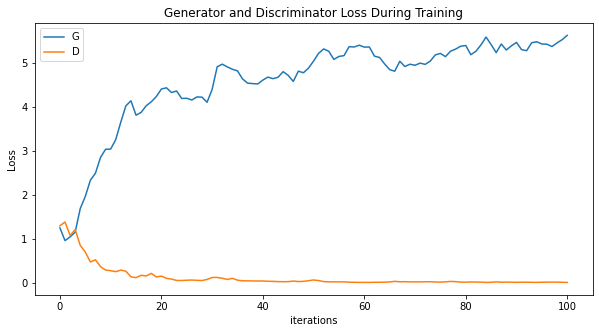

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("weawther_loss1.png")

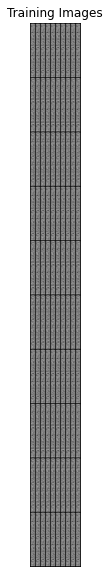

In [33]:
from torch.utils.data import DataLoader
from torchvision import utils, datasets, transforms
with torch.no_grad():
    inputs = netG(fixed_noise).detach().cpu()
       # print('fake sahpe is ',inputs.shape)
    #print('fake sahpe is ',inputs.shape)
plt.figure(figsize=(10,10))
plt.title("Training Images")
plt.axis('off')
inputs = utils.make_grid(inputs[:100]*0.5+0.5, nrow=10)
plt.imshow(inputs.permute(1, 2, 0))
plt.savefig("weather_syn0.png")

In [25]:
fixed_noise = torch.randn(1000, 100, 1, 1, device=device)
with torch.no_grad():
    input_1 = netG(fixed_noise).detach().cpu()

    print(input_1.shape,input_1.shape)
label_1 = torch.full((1000,), 1, dtype=torch.float, device='cpu')
print(label_1.shape)
print(label_1)

torch.Size([1000, 1, 150, 12]) torch.Size([1000, 1, 150, 12])
torch.Size([1000])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

In [13]:
### this is for label 0
netG.apply(weights_init)
netD.apply(weights_init)
print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(train_loader_orig_0, 0):
        #print(data['input'].shape)
        data['input']= data['input'][:,:,97:247,:]

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data['input'].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        
      #  print('netD output', output)
     #   print(output.shape)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
      #  print('netD of the fake output', output)
       # print(output[0:20])
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
     #   print('netD of the real output', output)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_loader_syn),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader_syn)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/50][0/2]	Loss_D: 1.3824	Loss_G: 0.9600	D(x): 0.5561	D(G(z)): 0.5270 / 0.4010
[1/50][0/2]	Loss_D: 1.0772	Loss_G: 1.0436	D(x): 0.9463	D(G(z)): 0.6236 / 0.3663
[2/50][0/2]	Loss_D: 1.2099	Loss_G: 1.1510	D(x): 0.9787	D(G(z)): 0.6764 / 0.3288
[3/50][0/2]	Loss_D: 0.8529	Loss_G: 1.6860	D(x): 0.9783	D(G(z)): 0.5517 / 0.1950
[4/50][0/2]	Loss_D: 0.7009	Loss_G: 1.9628	D(x): 0.9688	D(G(z)): 0.4742 / 0.1502
[5/50][0/2]	Loss_D: 0.4749	Loss_G: 2.3300	D(x): 0.9506	D(G(z)): 0.3397 / 0.1016
[6/50][0/2]	Loss_D: 0.5248	Loss_G: 2.4902	D(x): 0.9381	D(G(z)): 0.3555 / 0.0924
[7/50][0/2]	Loss_D: 0.3686	Loss_G: 2.8488	D(x): 0.9378	D(G(z)): 0.2574 / 0.0615
[8/50][0/2]	Loss_D: 0.2912	Loss_G: 3.0325	D(x): 0.9502	D(G(z)): 0.2099 / 0.0527
[9/50][0/2]	Loss_D: 0.2776	Loss_G: 3.0378	D(x): 0.9632	D(G(z)): 0.2097 / 0.0526
[10/50][0/2]	Loss_D: 0.2548	Loss_G: 3.2531	D(x): 0.9697	D(G(z)): 0.1984 / 0.0413
[11/50][0/2]	Loss_D: 0.2909	Loss_G: 3.6508	D(x): 0.9718	D(G(z)): 0.2268 / 0.0282
[12/50][0/2]

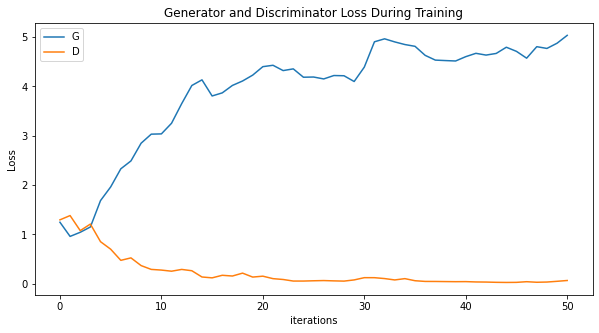

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("weather_loss.png")

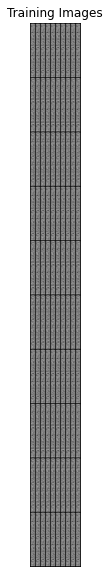

In [34]:
from torch.utils.data import DataLoader
from torchvision import utils, datasets, transforms
with torch.no_grad():
    inputs = netG(fixed_noise).detach().cpu()
       # print('fake sahpe is ',inputs.shape)
    #print('fake sahpe is ',inputs.shape)
plt.figure(figsize=(10,10))
plt.title("Training Images")
plt.axis('off')
inputs = utils.make_grid(inputs[:100]*0.5+0.5, nrow=10)
plt.imshow(inputs.permute(1, 2, 0))
plt.savefig("weather_syn1.png")

In [26]:
fixed_noise = torch.randn(1000, 100, 1, 1, device=device)
with torch.no_grad():
    input_0 = netG(fixed_noise).detach().cpu()
    print(input_1.shape,input_0.shape)
#print(label)
label_0 = torch.full((1000,), 0, dtype=torch.float, device='cpu')
print(label_0.shape)
#print(label)

combine_input = torch.cat((input_1,input_0),0)
print(combine_input.shape)
combine_label = torch.cat((label_1,label_0),0)
print(combine_label.shape)
print(input_1[0])
#print(input_2[0])
print(combine_input[0])
#print(combine_input[1000])
full_dataset_syn={}
attr_G=collections.OrderedDict()
for i in range (2000):
    attr_G[i]={
        'input' : combine_input[i],
          'label' : combine_label[i]
         }
for i in range(1000):
    
    print(attr_G[i]['input'].shape)



torch.Size([1000, 1, 150, 12]) torch.Size([1000, 1, 150, 12])
torch.Size([1000])
torch.Size([2000, 1, 150, 12])
torch.Size([2000])
tensor([[[ 0.1065, -0.0417,  0.0371,  ...,  0.0112, -0.0242, -0.1372],
         [ 0.1654, -0.3210,  0.0974,  ..., -0.0825, -0.0786, -0.0391],
         [ 0.0994,  0.4460,  0.4634,  ...,  0.6627,  0.3857, -0.0700],
         ...,
         [ 0.0950,  0.3579,  0.2253,  ...,  0.1952,  0.0190,  0.0507],
         [-0.0584, -0.0372,  0.0817,  ..., -0.1937, -0.0276, -0.1149],
         [-0.0610, -0.0352, -0.0780,  ..., -0.0540, -0.0771,  0.0129]]])
tensor([[[ 0.1065, -0.0417,  0.0371,  ...,  0.0112, -0.0242, -0.1372],
         [ 0.1654, -0.3210,  0.0974,  ..., -0.0825, -0.0786, -0.0391],
         [ 0.0994,  0.4460,  0.4634,  ...,  0.6627,  0.3857, -0.0700],
         ...,
         [ 0.0950,  0.3579,  0.2253,  ...,  0.1952,  0.0190,  0.0507],
         [-0.0584, -0.0372,  0.0817,  ..., -0.1937, -0.0276, -0.1149],
         [-0.0610, -0.0352, -0.0780,  ..., -0.0540, -0.077

torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])
torch.Size([1, 150, 12])


In [27]:
class HMData3(Dataset):
    def __init__(self,dataset,transform=None):
        self.c1=dataset
    def __len__(self):
        return len(self.c1)
    def __getitem__(self,i):
        final_data_c1=(self.c1[i]['input'])
        label=self.c1[i]['label']
        sample={
               'input':final_data_c1,
               'label':label
               }

        return sample

In [28]:
full_dataset_syn = HMData3(attr_G)
for i in range (0, len(full_dataset_syn)):
    print(i) 
    print('................',full_dataset_syn[i]['input'].shape)


0
................ torch.Size([1, 150, 12])
1
................ torch.Size([1, 150, 12])
2
................ torch.Size([1, 150, 12])
3
................ torch.Size([1, 150, 12])
4
................ torch.Size([1, 150, 12])
5
................ torch.Size([1, 150, 12])
6
................ torch.Size([1, 150, 12])
7
................ torch.Size([1, 150, 12])
8
................ torch.Size([1, 150, 12])
9
................ torch.Size([1, 150, 12])
10
................ torch.Size([1, 150, 12])
11
................ torch.Size([1, 150, 12])
12
................ torch.Size([1, 150, 12])
13
................ torch.Size([1, 150, 12])
14
................ torch.Size([1, 150, 12])
15
................ torch.Size([1, 150, 12])
16
................ torch.Size([1, 150, 12])
17
................ torch.Size([1, 150, 12])
18
................ torch.Size([1, 150, 12])
19
................ torch.Size([1, 150, 12])
20
................ torch.Size([1, 150, 12])
21
................ torch.Size([1, 150, 12])
22
................ 

................ torch.Size([1, 150, 12])
687
................ torch.Size([1, 150, 12])
688
................ torch.Size([1, 150, 12])
689
................ torch.Size([1, 150, 12])
690
................ torch.Size([1, 150, 12])
691
................ torch.Size([1, 150, 12])
692
................ torch.Size([1, 150, 12])
693
................ torch.Size([1, 150, 12])
694
................ torch.Size([1, 150, 12])
695
................ torch.Size([1, 150, 12])
696
................ torch.Size([1, 150, 12])
697
................ torch.Size([1, 150, 12])
698
................ torch.Size([1, 150, 12])
699
................ torch.Size([1, 150, 12])
700
................ torch.Size([1, 150, 12])
701
................ torch.Size([1, 150, 12])
702
................ torch.Size([1, 150, 12])
703
................ torch.Size([1, 150, 12])
704
................ torch.Size([1, 150, 12])
705
................ torch.Size([1, 150, 12])
706
................ torch.Size([1, 150, 12])
707
................ torch.Size([1, 15

................ torch.Size([1, 150, 12])
1482
................ torch.Size([1, 150, 12])
1483
................ torch.Size([1, 150, 12])
1484
................ torch.Size([1, 150, 12])
1485
................ torch.Size([1, 150, 12])
1486
................ torch.Size([1, 150, 12])
1487
................ torch.Size([1, 150, 12])
1488
................ torch.Size([1, 150, 12])
1489
................ torch.Size([1, 150, 12])
1490
................ torch.Size([1, 150, 12])
1491
................ torch.Size([1, 150, 12])
1492
................ torch.Size([1, 150, 12])
1493
................ torch.Size([1, 150, 12])
1494
................ torch.Size([1, 150, 12])
1495
................ torch.Size([1, 150, 12])
1496
................ torch.Size([1, 150, 12])
1497
................ torch.Size([1, 150, 12])
1498
................ torch.Size([1, 150, 12])
1499
................ torch.Size([1, 150, 12])
1500
................ torch.Size([1, 150, 12])
1501
................ torch.Size([1, 150, 12])
1502
.............

In [ ]:
train_size_syn = int(1 * len(full_dataset_syn))
test_size_syn = len(full_dataset_syn) - train_size_syn
print('the training size after division is',train_size_syn)
train_dataset_syn, test_dataset_syn = torch.utils.data.random_split(full_dataset_syn, [train_size_syn, test_size_syn])


In [29]:
batch_size = 100
train_loader_syn = torch.utils.data.DataLoader(dataset=train_dataset_syn,
                                            batch_size=batch_size, 
                                            shuffle=True)
print(len(train_loader_syn))

2


In [30]:
for i, data in enumerate(test_loader_test, 0):
    print(i)
    print(data['input'].shape)

0
torch.Size([15, 1, 365, 12])


In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        print('test+++++++++++++')
        self.conv = nn.Sequential(
            nn.BatchNorm2d(1),
            nn.Conv2d(1, 20, (5,12)), 
            ##shape from 365*5  to 20*361
            nn.BatchNorm2d(20),
            nn.ReLU(),
            Reshape(1,20,146),  #361
            nn.MaxPool2d((1,13), (1,1)), 
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.3),
            #1*20*361(361-13+1)
            nn.Linear(1*20*134, 120),#349
            nn.BatchNorm1d(120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.BatchNorm1d(84),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(84, 2)
        )
        

    def forward(self, img):
       # print(img.shape)
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0], -1))
        output = torch.softmax(output,dim = 1)
        return output


In [32]:

#print(net)
def evaluate_accuracy(data_iter, net, w,device=None):
    net = net.to(device)
    if device is None and isinstance(net, torch.nn.Module):
        # 如果没指定device就使用net的device
        device = list(net.parameters())[0].device
    acc_sum, n = 0.0, 0
    with torch.no_grad():
        for XX in data_iter:
            X= XX['input'].to(device)
            y = XX['label'].to(device)
         #   Z = XX['entryID']
            X= X[:,:,97:247,:]
           # print('input 第一行 is', X[w][0][0])
           # print('ID is\n',Z[w])
           # print('y value is\n',y[w])
            if isinstance(net, torch.nn.Module):
                net.eval() # 评估模式, 这会关闭dropout
                acc_sum += (net(X.to(device)).argmax(dim=1) == y.to(device)).float().sum().cpu().item()
        #        print('y_hat is\n',net(X.to(device)).argmax(dim=1))
        #        print('y value is\n',y)
                net.train() # 改回训练模式
            else: # 自定义的模型, 3.13节之后不会用到, 不考虑GPU
                if('is_training' in net.__code__.co_varnames): # 如果有is_training这个参数
                    # 将is_training设置成False
                    acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item() 
                else:
                    acc_sum += (net(X).argmax(dim=1) == y).float().sum().item() 
            n += y.shape[0]
            y_pre = net(X)
            y_pre = y_pre.argmax(dim=1).cpu()
            y = y.cpu()
     #       print(y_pre)
     #       print(y)
            y_p_np=y_pre.numpy()
            
            y_np=y.numpy()
            f1_test = f1_score(y_np,y_p_np,average = 'weighted')
      #  print('f1 is ',f1_test)
#        f= open(result_file,'a')
#        f.write(str(acc_sum/n))
#        f.write(',')
#        f.write('%')
#        f.write(',')
#        f.write(str(f1_test))
#        f.write(',')
#        f.close()
       # f1_score_orig.append(f1_test)
       # acc_orig.append(acc_sum/n)

#    print('test_acc is and n is', acc_sum, n)
    return acc_sum / n
def train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs,w):
    net = net.to(device)
    print("training on ", device)
    loss = torch.nn.CrossEntropyLoss()
    best_loss = float('inf')    

    for epoch in range(num_epochs):
        
        batch_count = 0
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for XX in train_iter: 
            
    #        print(XX['input'].type())
            X = XX['input'].to(device)
  #          print(X.shape)
     #       print(XX['label'].type()) 
            y = XX['label'].to(device) 
         #   z = XX['entryID']
           # X= X[:,:,97:247,:]
        #    print('x shape is',X.shape)
            y_hat = net(X)  
       #     print(y_hat.type())
       #     print(y.type())
        #    print('\n\n ID is',z)
        #    print('\n \n \n y is', y)
       #     print('y_hat is', y_hat, '/n /n')
            if epoch >(num_epochs - 1):
                ans = []
                for t in y_hat:
                    if t[0]>t[1]:
                        ans.append(0)
                    else:ans.append(1)
            l = loss(y_hat, y.long())
         #   print('loss is',l)
           # if l < best_loss:
           #     best_loss = l
           #     torch.save(net, 'best_model.pth') 
                
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.cpu().item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().cpu().item()
 #           print('train_l  ++ train_acc',train_l_sum, train_acc_sum)            
#            if epoch >80:
 #               print('yhat', y_hat.argmax(dim=1))
   #              print('y is',y)
   #             print('geneID is',XX['entryID'])
   #             print('train_acc_sum is ',train_acc_sum)
   #             print('input matrix is',XX['input'])
            n += y.shape[0]
            batch_count += 1
            
        
        #print('epoch is', epoch,'num_epoch is', num_epochs-5)
        if epoch > 0:
            #f= open(result_file,'a')

            #f.write(str(epoch))
            #f.write(',')
            #f.close()

            test_acc = evaluate_accuracy(test_iter, net,w)
             #   print('test_acc is', test_acc)
        #    Loss.append(train_l_sum / batch_count)
            print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ epoch', epoch)
            print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time %.1f sec'
                      % (epoch + 1, train_l_sum / batch_count, train_acc_sum / n, 
                         test_acc, time.time() - start))


In [ ]:
print(test_loader_test)

In [ ]:
#
class Reshape(nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args
    def forward(self, x):
#        print('bug is here.........',x.shape)
        return x.view((x.size(0),)+self.shape)
net = Net()
lr, num_epochs = 0.001, 600
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
train_ch5(net, train_loader_syn, test_loader_test, 13, optimizer, device, num_epochs,w=5)